## EDA for starters

* 가볍게 데이터 탐색을 위한 EDA
* 데이터 설명을 봤을때 credit 숫자가 높을수록 신용도가 낮은 것! 

[데이터 변수 설명하는 페이지](https://www.dacon.io/competitions/official/235713/talkboard/402821/)

* index

* gender: 성별

* car: 차량 소유 여부

* reality: 부동산 소유 여부

* child_num: 자녀 수

* income_total: 연간 소득

* income_type: 소득 분류

* ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']

* edu_type: 교육 수준

* ['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']


* family_type: 결혼 여부

* ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']


* house_type: 생활 방식

* ['Municipal apartment', 'House / apartment', 'With parents',

*  'Co-op apartment', 'Rented apartment', 'Office apartment']


* DAYS_BIRTH: 출생일

* 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미


* DAYS_EMPLOYED: 업무 시작일

* 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미

* 양수 값은 고용되지 않은 상태를 의미함

* FLAG_MOBIL: 핸드폰 소유 여부

* work_phone: 업무용 전화 소유 여부

* phone: 전화 소유 여부

* email: 이메일 소유 여부

* occyp_type: 직업 유형

* family_size: 가족 규모

* begin_month: 신용카드 발급 월

* 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미


* credit: 사용자의 신용카드 대금 연체를 기준의 신용도

* => 낮을 수록 높은 신용의 신용카드 사용자를 의미함

In [1]:
# Libraries

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [3]:
def days_to_age(x):
    return (x*-1)/365

def categorical_show(df, col, y_cols='credit'):
    from collections import Counter
    print('unique items:', df[col].unique())
    print()
    counter = Counter(df[col]) # 딕셔너리 형태로 나온 값 카운트. 
    print(counter)
    plt.bar(counter.keys(), counter.values())
    plt.xticks(rotation=30) # x축의 레이블 텍스트를 30도 만큼 회전
    plt.title('people in classes')
    plt.show()
    
    fig, axes = plt.subplots(1, len(df[col].unique()), figsize=(16,4))
    
    # subplots()에선 두개의 값을 받을 수 있는데 figure 와 axes 값을 받을 수 있다.
    # 순서가 중요
    # fig란 figure로써 - 전체 subplot을 말한다, 전체 사이즈를 말함
    # ax는 axe로써 - 전체 중 낱낱개를 말한다.
    
    # enumerate: 인덱스 번호도 함께 반복문 수행
    for i,w in enumerate(df[col].unique()):
        axes[i].hist(df[y_cols][df[col]==w], bins=3, color='dimgray', rwidth=0.8)
        axes[i].set_title(w)
    plt.show()
        
def group_by_mean(df, col):
    print(train.groupby(col).credit.mean())
    train.groupby(col).credit.mean().plot.bar()
    plt.title('mean credit')
    plt.show()

In [3]:
# Load Data
train = pd.read_csv('./train.csv', index_col='index')
test = pd.read_csv('./test.csv', index_col='index')

In [5]:
train_y = train['credit'].astype(int)

In [7]:
# FLAG_MOBIL 컬럼은 모두 같은 값 (=1), 무의미한 정보
print(train['FLAG_MOBIL'].unique())
print(test['FLAG_MOBIL'].unique())

[1]
[1]


,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
index,,,,,,,,,,,,,,,,,,,
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0


-------------------------------


index
0        False
1        False
2         True
3        False
4        False
         ...  
26452    False
26453    False
26454    False
26455     True
26456    False
Name: gender, Length: 26457, dtype: bool

-------------------------------
index
2        2
7        0
8        2
11       2
15       0
        ..
26438    2
26444    2
26447    2
26448    0
26455    2
Name: credit, Length: 8760, dtype: int32
-------------------------------


array([1., 2., 0.])

-------------------------------
-------------------------------
2    64.134256
1    23.687493
0    12.178252
Name: credit, dtype: float64
-------------------------------


<AxesSubplot:xlabel='credit', ylabel='Density'>

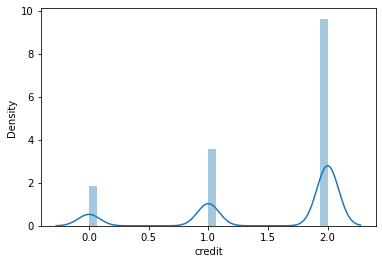

In [77]:
display(train.head(3))
print('-------------------------------')
display(train['gender']=='M')
print('-------------------------------')
print(train_y[train['gender']=='M'])
print('-------------------------------')
display(train['credit'].unique())
print('-------------------------------')
print('-------------------------------')
print((train_y.value_counts()/len(train_y))*100) # 종속변수의 비율확인
print('-------------------------------')
sns.distplot(train_y)

#### Binary Features

* 모든 변수에서 큰 차이는 없음
* phone, email 변수에서는 0 (미소유) 한 사람들이 credit 2 (신용도 안좋음)의 비율이 높음

Text(0.5, 1.0, 'reality')

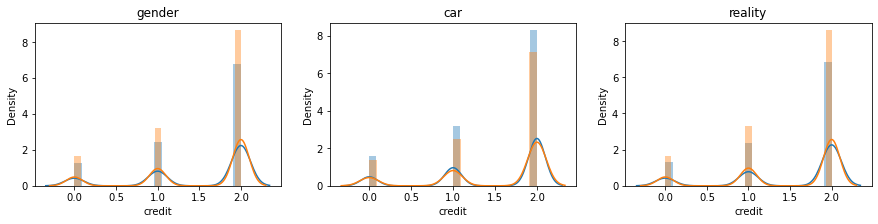

In [9]:
# Binary Features
# 각 변수마다의 분포 확인

fig, axes = plt.subplots(1,3, figsize=(15,3))

# 성별
sns.distplot(train_y[train['gender']=='M'], ax=axes[0]) # 남자인 사람들의 credit 만 출력됨, 먼저 파란색
sns.distplot(train_y[train['gender']=='F'], ax=axes[0]) # 다음 아이보리색으로 그래프 그려짐

# 차 소유 여부
sns.distplot(train_y[train['car']=='N'], ax=axes[1])
sns.distplot(train_y[train['car']=='Y'], ax=axes[1])

# 부동산 소유 여부
sns.distplot(train_y[train['reality']=='N'], ax=axes[2])
sns.distplot(train_y[train['reality']=='Y'], ax=axes[2])

axes[0].set_title('gender')
axes[1].set_title('car')
axes[2].set_title('reality')

Text(0.5, 1.0, 'email')

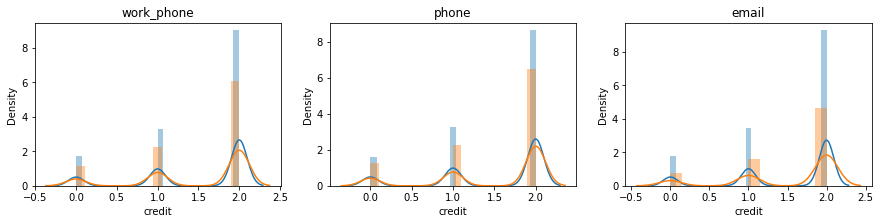

In [10]:
fig, axes = plt.subplots(1,3, figsize=(15,3))

# 업무용 전화 소유 여부
sns.distplot(train_y[train['work_phone']==0], ax=axes[0]) 
sns.distplot(train_y[train['work_phone']==1], ax=axes[0]) 

# 가정용 전화 소유 여부
sns.distplot(train_y[train['phone']==0], ax=axes[1])
sns.distplot(train_y[train['phone']==1], ax=axes[1])

# 이메일 소유 여부
sns.distplot(train_y[train['email']==0], ax=axes[2])
sns.distplot(train_y[train['email']==1], ax=axes[2])

axes[0].set_title('work_phone')
axes[1].set_title('phone')
axes[2].set_title('email')

In [11]:
# 동시에 가지고 있는 사람 수, '*'가 and의 의미인듯. (&과 같음)
print(f"phone and work_phone: {round(np.sum(train['work_phone']*train['phone'])/len(train)*100,3)}%")
print(f"work_phone and email: {round(np.sum(train['work_phone']*train['email'])/len(train)*100,3)}%")
print(f"phone and email: {round(np.sum(train['email']*train['phone'])/len(train)*100,3)}%")
print(f"all: {round(np.sum(train['work_phone']*train['phone']*train['email'])/len(train)*100,3)}%")

phone and work_phone: 12.515%
work_phone and email: 1.678%
phone and email: 2.85%
all: 1.051%


#### Numerical

##### child_num and family_size (자녀 수와 가족 규모)
* 굉장히 극단적인 값 (5++) 이 있어서 잘못된 정보처럼 보였으나 두 변수간의 차이를 보면 일정했음
* 어떠한 이유인지는 모르나 잘못 기입하지는 않았을 것 ( 그럼에도 극단적이긴함)
* 두 변수의 차이는 [-1,0,1,2]로 나타남 (train/test 모두)
* 음수의 경우 상식적으로 이해되지 않음..
* 다만 해당 경우는 많지 않고, 이 경우에는 credit이 모두 2 (신용도 낮음) 인 것이 특징

##### Others
* income_total의 경우 로그를 취하면 노말에 가까워짐
* credit에 따라서 income의 경우 크게 다르지 않은 것으로 확인
<br>
* DAYS_BIRTH를 연령으로 바꾸어 나타내 봄
 * 20대 이상만 존재하며 20대 초중반의 경우 사람 수가 적음
 * 최소는 21세, 최고 69세
<br>
* DAYS_EMPLOYED의 경우 무직이 포함됨
 * 로그 변환을 해주면 고용되어 있는 사람의 경우 노말하게 분포

childnum unique: [ 0  1  2  3  4  5 14 19  7]
family size and unique: [ 2.  3.  4.  1.  5.  6.  7. 15. 20.  9.]


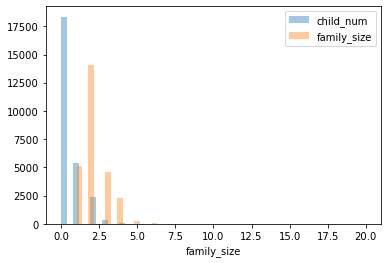

In [12]:
print('childnum unique:', train['child_num'].unique())
print('family size and unique:', train['family_size'].unique())

sns.distplot(train['child_num'], kde=False, label='child_num')
sns.distplot(train['family_size'], kde=False, label='family_size')
plt.legend()

In [13]:
# family size - child num
print('train', (train['family_size'] - train['child_num']).unique())
print('test', (test['family_size'] - test['child_num']).unique())

train [ 2.  1.  0. -1.]
test [ 2.  1. -1.  0.]


In [14]:
# 음수의 경우 credit이 모두 2
train_y[(train['family_size'] - train['child_num']).isin([0,-1])]

index
5825     2
14900    2
16110    2
16791    2
18879    2
21096    2
Name: credit, dtype: int32

In [15]:
test[(test['family_size'] - test['child_num']).isin([0,-1])]

# 이 두명은 2일 가능성이 높다... train에서의 사례를 참고하면

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
index,,,,,,,,,,,,,,,,,,
31375,M,Y,N,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-14452,-4249,1,0,0,0,Drivers,1.0,-35.0
34703,M,N,N,1,180000.0,Working,Secondary / secondary special,Married,House / apartment,-10656,-926,1,1,1,0,Laborers,1.0,-18.0


In [16]:
# 두 변수간의 상관관계 (피어슨 상관계수)
np.corrcoef(train['family_size'], train['child_num'])

array([[1.        , 0.89053018],
       [0.89053018, 1.        ]])

* 상관계수 높음

#### income_total

<AxesSubplot:>

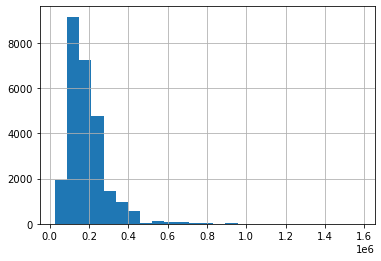

In [19]:
train['income_total'].hist(bins=25)
# bins: 구간 나누기. 

<AxesSubplot:>

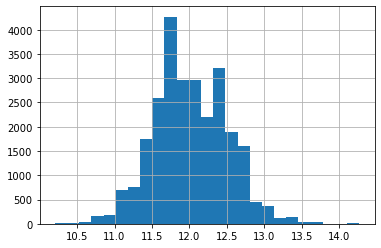

In [20]:
train['income_total'].apply(np.log).hist(bins=25)

Text(0.5, 1.0, 'y=2')

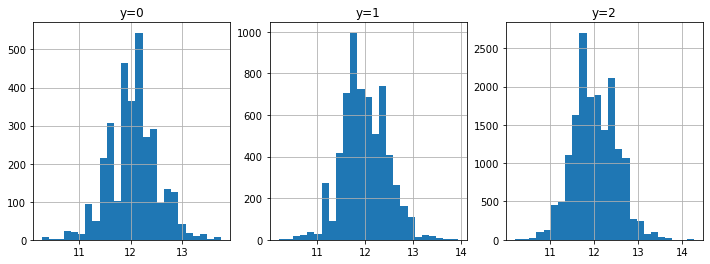

In [24]:
# credit에 따라 소득의 분포가 크게 달라보이지 않음
fig, axes = plt.subplots(1,3, figsize=(12,4))
train['income_total'].apply(np.log)[train_y==0].hist(bins=25, ax=axes[0])
train['income_total'].apply(np.log)[train_y==1].hist(bins=25, ax=axes[1])
train['income_total'].apply(np.log)[train_y==2].hist(bins=25, ax=axes[2])

axes[0].set_title('y=0')
axes[1].set_title('y=1')
axes[2].set_title('y=2')

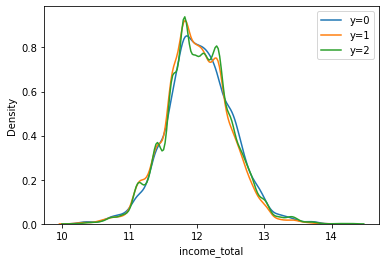

In [25]:
sns.distplot(train['income_total'].apply(np.log)[train_y==0], label='y=0', hist=False)
sns.distplot(train['income_total'].apply(np.log)[train_y==1], label='y=1', hist=False)
sns.distplot(train['income_total'].apply(np.log)[train_y==2], label='y=2', hist=False)
plt.legend()

#### DAYS_BIRTH

<AxesSubplot:>

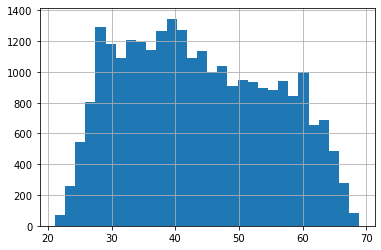

In [26]:
train['DAYS_BIRTH'].apply(days_to_age).hist(bins=30)

In [30]:
# 최소 연령, 최대 연령
print(min(train['DAYS_BIRTH'].apply(days_to_age)))
print(max(train['DAYS_BIRTH'].apply(days_to_age)))

21.10958904109589
68.90958904109588


age_groups
20's    1.496951
30's    1.501318
40's    1.538132
50's    1.529709
60's    1.532656
Name: credit, dtype: float64


<AxesSubplot:xlabel='age_groups'>

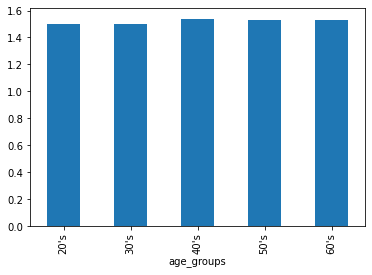

In [44]:
# 확실히 20~30의 경우 약간 더 낮은 경향이 있음 -> 더 신용도가 좋다. 
bins = np.arange(2,8)*10
labels = [str(s)+'\'s' for s in bins[:-1]]

df = train.copy()
df['age_groups'] = pd.cut(train['DAYS_BIRTH'].apply(days_to_age), bins, labels=labels) # 동일 길이로 나누어서 범주 만들기
print(df.groupby('age_groups').credit.mean())

df.groupby('age_groups').credit.mean().plot.bar()

#### DAYS_EMPLOYED

<AxesSubplot:>

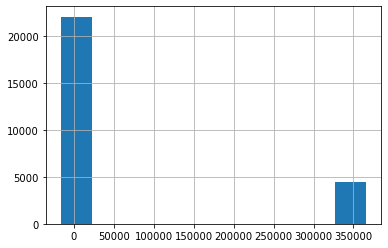

In [45]:
# 양수는 무직자 (고용되지 않은 상태)
train['DAYS_EMPLOYED'].hist()

not working: 4438(16.774 %)


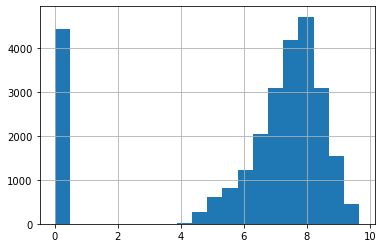

In [48]:
# 0이 무직자로 변환(로그)
df = train['DAYS_EMPLOYED'].map(lambda x: x if x<0 else 0 ).apply(lambda x: np.log1p(x*-1))
df.hist(bins=20)
print(f'not working: {np.sum(df==0)}({round(np.sum(df==0)/len(df)*100, 3)} %)')

not working credit mean :  1.5141955835962144
working credit mean :  1.520641264362596


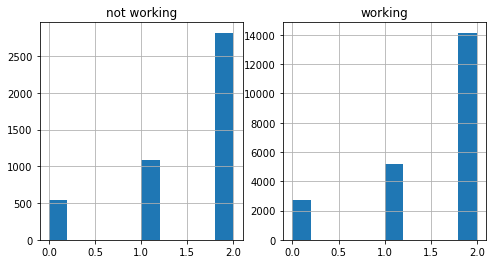

In [55]:
print('not working credit mean : ', train_y[df==0].mean())
print('working credit mean : ', train_y[df!=0].mean())

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
train_y[df==0].hist(ax=axes[0])
train_y[df!=0].hist(ax=axes[1])

axes[0].set_title('not working')
axes[1].set_title('working')
plt.show()

### categorical
* income_type의 경우에도 대부분 비슷한 경향
* student의 경우 7 경우 밖에 되지 않음 (test는 경우 4)
 * credit의 경우 1,2만 나타남
* income_type을 제외한 변수들은 1~2개 class에 대부분의 값이 몰려 있는 것을 알 수 있음

#### income_type (소득 분류)

unique items: ['Commercial associate' 'Working' 'State servant' 'Pensioner' 'Student']

Counter({'Working': 13645, 'Commercial associate': 6202, 'Pensioner': 4449, 'State servant': 2154, 'Student': 7})


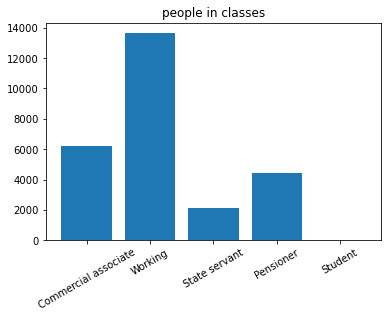

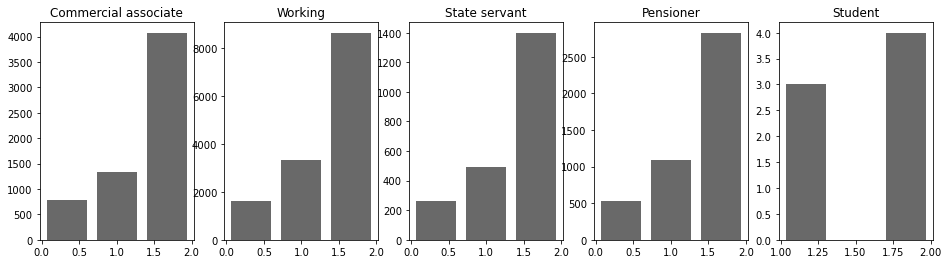

In [59]:
categorical_show(train, 'income_type') # 위에서 만든 함수

In [57]:
train_y[train['income_type']=='Student']

# 학생의 신용 안좋음. (0이 없어)

index
2990     2
3602     1
6223     2
8936     1
11646    2
21681    1
23119    2
Name: credit, dtype: int32

income_type
Commercial associate    1.531119
Pensioner               1.515397
State servant           1.526927
Student                 1.571429
Working                 1.514474
Name: credit, dtype: float64


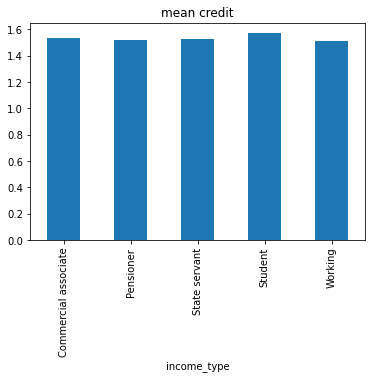

In [58]:
group_by_mean(train,'income_type') # 위에서 만든 함수

unique items: ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

Counter({'Secondary / secondary special': 17995, 'Higher education': 7162, 'Incomplete higher': 1020, 'Lower secondary': 257, 'Academic degree': 23})


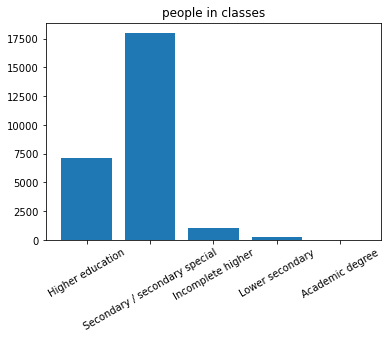

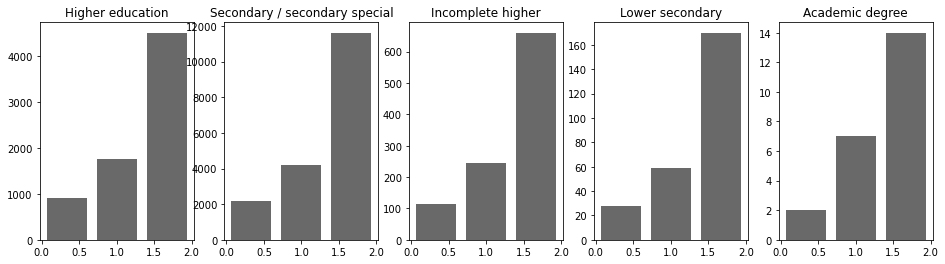

In [60]:
# Academic degree의 경우 샘플수가 많이 적다.
categorical_show(train, 'edu_type')

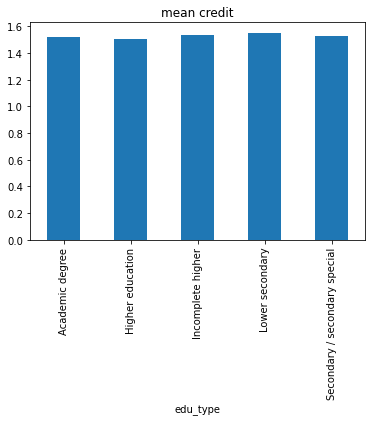

edu_type
Academic degree                  1.521739
Higher education                 1.501676
Incomplete higher                1.535294
Lower secondary                  1.552529
Secondary / secondary special    1.525313
Name: credit, dtype: float64


In [61]:
train.groupby('edu_type').credit.mean().plot.bar()
plt.title('mean credit')
plt.show()
print(train.groupby('edu_type').credit.mean())

#### family_type

unique items: ['Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow']

Counter({'Married': 18196, 'Single / not married': 3496, 'Civil marriage': 2123, 'Separated': 1539, 'Widow': 1103})


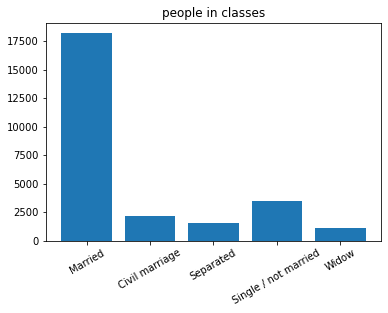

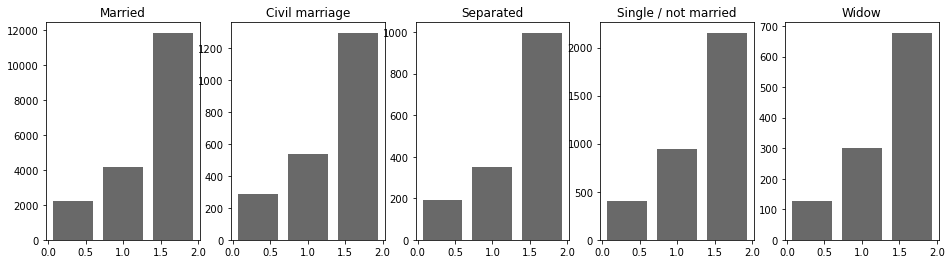

In [62]:
# 다수가 기혼
categorical_show(train, 'family_type')

#### house_type

unique items: ['Municipal apartment' 'House / apartment' 'With parents'
 'Co-op apartment' 'Rented apartment' 'Office apartment']

Counter({'House / apartment': 23653, 'With parents': 1257, 'Municipal apartment': 818, 'Rented apartment': 429, 'Office apartment': 190, 'Co-op apartment': 110})


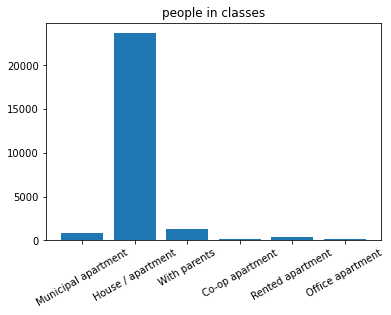

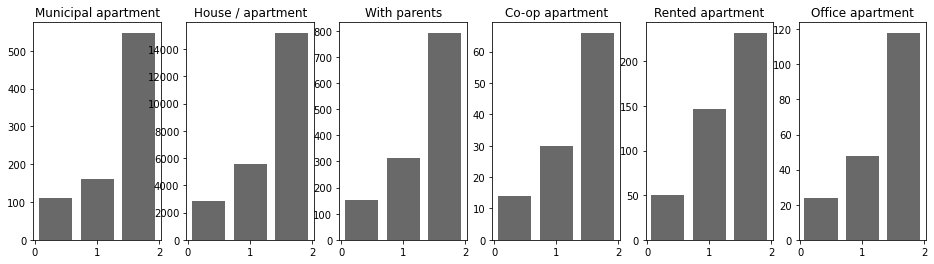

In [63]:
# 대부분이 하우스/아파트
# 일부 class는 샘플수가 크게 적어 보임
categorical_show(train, 'house_type')

#### occyp_type (직업유형)

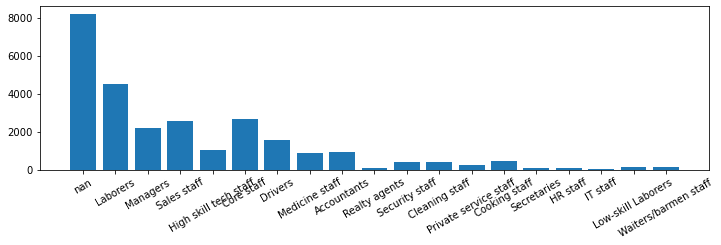

,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,nan
index,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26453,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
26454,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,nan
count,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,0.034093,0.015232,0.017273,0.100011,0.059531,0.002343,0.039309,0.001550,0.170541,0.004800,0.081906,0.032657,0.009185,0.002381,0.095967,0.003666,0.016026,0.004687,0.308841
std,0.181472,0.122478,0.130290,0.300021,0.236620,0.048353,0.194333,0.039336,0.376114,0.069119,0.274227,0.177740,0.095398,0.048741,0.294552,0.060440,0.125578,0.068301,0.462024
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# 직업을 기입하지 않은 경우가 30%

plt.figure(figsize=(12, 3))
counter = Counter(train.replace(np.nan, 'nan')['occyp_type'])
plt.bar(counter.keys(), counter.values())
plt.xticks(rotation=30)
plt.show()

display(pd.get_dummies(train.replace(np.nan, 'nan')['occyp_type']))
pd.get_dummies(train.replace(np.nan, 'nan')['occyp_type']).describe()

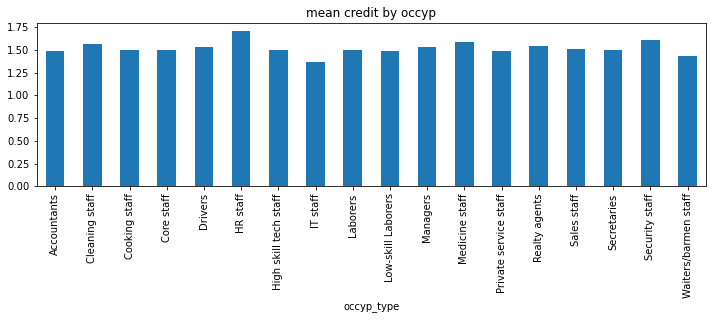

occyp_type
Accountants              1.486696
Cleaning staff           1.570720
Cooking staff            1.505470
Core staff               1.502646
Drivers                  1.535238
HR staff                 1.709677
High skill tech staff    1.503846
IT staff                 1.365854
Laborers                 1.500443
Low-skill Laborers       1.488189
Managers                 1.530226
Medicine staff           1.586806
Private service staff    1.485597
Realty agents            1.539683
Sales staff              1.513194
Secretaries              1.494845
Security staff           1.608491
Waiters/barmen staff     1.435484
Name: credit, dtype: float64


In [65]:
plt.figure(figsize=(12, 3))
train.groupby('occyp_type').credit.mean().plot.bar()
plt.title('mean credit by occyp')
plt.show()

print(train.groupby('occyp_type').credit.mean())